# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sayyidan Muhamad Ikhsan
- **Email:** sayyidan.xyz@gmail.com
- **ID Dicoding:** sayyidan-i

## Menentukan Pertanyaan Bisnis

- Do people tend to rent bikes more on clear days compared to rainy or snow days?
- In which season where demand significantly increases?
- What are the weekly variations in bike rental demand, and how do these patterns differ across different user type (casual and registered)?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# load table day and preview the contents
day_df = pd.read_csv('data/day.csv')
day_df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058


In [6]:
# load table hour and preview the contents
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data Day

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing Data Hour

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

*   To make our processing more effective and efficient we only use the day_df dataframe. That's because we don't need 'hours' parameters in our analysis purposes
*   Take only the necessary fields: dtday, weather, season, casual, resgistered, cnt
*   Convert data type in 'weekday', 'weathersit', and 'season' fields to categorical type








In [13]:
column = ['dteday', 'weathersit', 'season', 'weekday', 'casual', 'registered', 'cnt']
day_df_new = day_df[column].copy()

In [14]:
# convert column 'weekday' to the day name
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df_new['weekday'].replace(day_mapping, inplace=True)

# convert column 'weathersit' to the weather name
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Rainsnow', 4: 'Heavy Rainsnow'}
day_df_new['weathersit'].replace(weather_mapping, inplace=True)

# convert column 'season' to the season name
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df_new['season'].replace(season_mapping, inplace=True)

In [15]:
# convert column weekday, weathersit, and season to category type
day_df_new['weekday'] = day_df_new['weekday'].astype("category")
day_df_new['weathersit'] = day_df_new['weathersit'].astype("category")
day_df_new['season'] = day_df_new['season'].astype("category")

# convert column dteday to datetime type
day_df_new['dteday'] = pd.to_datetime(day_df_new['dteday'])

In [16]:
day_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   weathersit  731 non-null    category      
 2   season      731 non-null    category      
 3   weekday     731 non-null    category      
 4   casual      731 non-null    int64         
 5   registered  731 non-null    int64         
 6   cnt         731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(3)
memory usage: 25.8 KB


In [17]:
day_df_new.head()

,dteday,weathersit,season,weekday,casual,registered,cnt
0,2011-01-01,Misty,Spring,Saturday,331,654,985
1,2011-01-02,Misty,Spring,Sunday,131,670,801
2,2011-01-03,Clear,Spring,Monday,120,1229,1349
3,2011-01-04,Clear,Spring,Tuesday,108,1454,1562
4,2011-01-05,Clear,Spring,Wednesday,82,1518,1600


## Exploratory Data Analysis (EDA)

In [18]:
# see all statistics preview
day_df_new.describe(include='all')

,dteday,weathersit,season,weekday,casual,registered,cnt
count,731,731,731,731,731.000000,731.000000,731.000000
unique,NaN,3,4,7,NaN,NaN,NaN
top,NaN,Clear,Fall,Monday,NaN,NaN,NaN
freq,NaN,463,188,105,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,3410.000000,6946.000000,8714.000000


In [19]:
# rental bike amount based on weather
grouped = day_df_new.groupby("weathersit")
grouped_sum = grouped['cnt'].sum()
weathersit_grouped = grouped_sum.sort_values(ascending=False).reset_index()
weathersit_grouped

C:\Users\cengceng\AppData\Local\Temp\ipykernel_14616\916442715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = day_df_new.groupby("weathersit")


,weathersit,cnt
0,Clear,2257952
1,Misty,996858
2,Light Rainsnow,37869


In [20]:
# rental bike amount based on season
grouped = day_df_new.groupby("season")
grouped_sum = grouped['cnt'].sum()
season_grouped = grouped_sum.sort_values(ascending=False).reset_index()
season_grouped

C:\Users\cengceng\AppData\Local\Temp\ipykernel_14616\2875999244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = day_df_new.groupby("season")


,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [21]:
# create pivot to see the distribution of bike rental demand within a week

pivot_week = day_df_new.pivot_table(index='weekday', values=['casual', 'registered'], aggfunc='sum')
pivot_week

,casual,registered
weekday,,
Friday,78238,409552
Monday,70784,384719
Saturday,153852,323955
Sunday,140521,303506
Thursday,61460,423935
Tuesday,57843,411266
Wednesday,57319,415729


## Visualization & Explanatory Analysis

### Pertanyaan 1: Do people tend to rent bikes more on clear days compared to rainy or snow days?

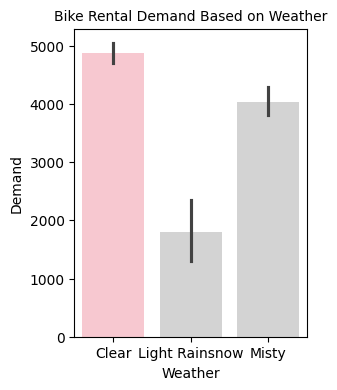

In [22]:
# create bar chart to see the rent demand based on weather situation

fig1, ax1 = plt.subplots(figsize=(3,4))
sns.barplot(x="weathersit", y="cnt", data=day_df_new, palette=["pink", "lightgrey", "lightgrey"], hue='weathersit', legend=False)
ax1.set_xlabel('Weather')
ax1.set_ylabel('Demand')
ax1.set_title('Bike Rental Demand Based on Weather', fontsize=10)
plt.show()

### Pertanyaan 2: In which season where demand significantly increases?

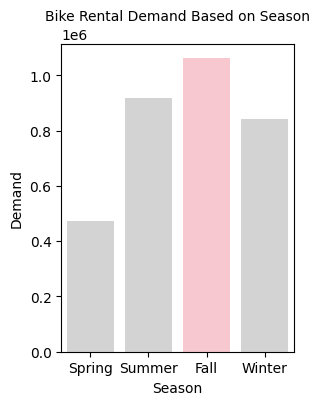

In [23]:
# create bar chart to see the rent demand based on season

fig2, ax2 = plt.subplots(figsize=(3,4))
sns.barplot(x="season", y="cnt", data=season_grouped, palette=["pink", "lightgrey", "lightgrey", "lightgrey"], order=['Spring', 'Summer', 'Fall', 'Winter'], hue='season', legend=False)
ax2.set_xlabel('Season')
ax2.set_ylabel('Demand')
ax2.set_title('Bike Rental Demand Based on Season', fontsize=10)
plt.show()

### Pertanyaan 3: What are the weekly variations in bike rental demand, and how do these patterns differ across different user type (casual and registered)?

In [24]:
type(pivot_week)

pandas.core.frame.DataFrame

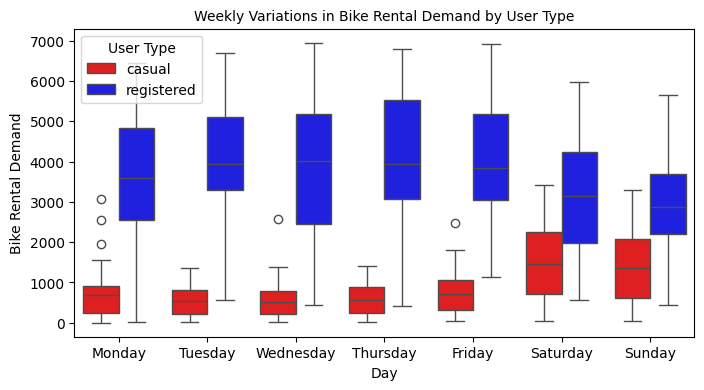

In [25]:
# create bar chart to see the rent demaand variations weekly

melted_df = day_df_new.melt(id_vars='weekday', value_vars=['casual', 'registered'], var_name='User Type', value_name='Demand')

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="weekday", y='Demand', data=melted_df, palette=["red", "blue"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='User Type')
ax.set_xlabel('Day')
ax.set_ylabel('Bike Rental Demand')
ax.set_title('Weekly Variations in Bike Rental Demand by User Type', fontsize=10)
plt.show()

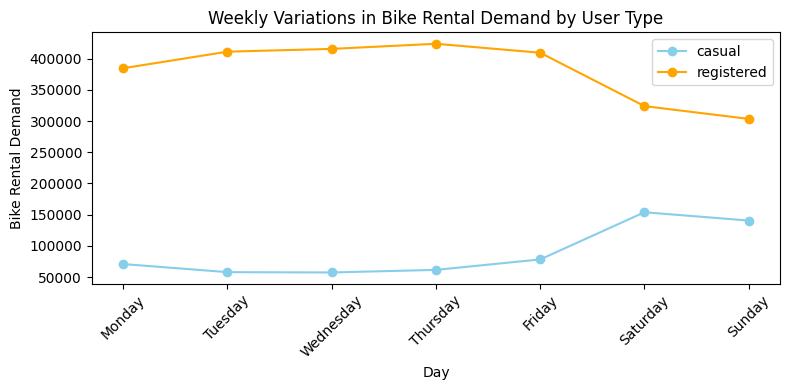

In [26]:
# Define custom order for weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the index of the pivot table
pivot_week = pivot_week.reindex(custom_order)

# Plotting
plt.figure(figsize=(8, 4))

# Plot for casual users
plt.plot(pivot_week.index, pivot_week['casual'], marker='o', label='casual', color='skyblue')

# Plot for registered users
plt.plot(pivot_week.index, pivot_week['registered'], marker='o', label='registered', color='orange')

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Bike Rental Demand')
plt.title('Weekly Variations in Bike Rental Demand by User Type')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Conclusion

- Q1: Do people tend to rent bikes more on clear days compared to rainy or snow days?

Conclusion: Based on the visualization above, which depicts the distribution of bike rental demand across different weather situations, it is evident that days categorized as 'clear' exhibit the highest demand compared to other weather conditions.

- Q2: In which season where demand significantly increases?

Conclusion: From the visualization above, it is evident that the demand for bike rentals experiences a significant increase during the Fall season compared to other seasons with total 1061129 records. This suggests that Fall is the peak season for bike rentals, with a noticeable surge in demand.

- Q3: What are the weekly variations in bike rental demand, and how do these patterns differ across different user type (casual and registered)?

Conclusion: The weekly variations in bike rendal demand exhibit distinct patterns across different user types. Casual users demonstrate a relatively stable demand throughout the weekdays, with an evident increase during the weekends. In the other hand, registered users maintain consistent demand levels on weekdays, which taper off during the weekend. This suggests that casual users are more inclined to rent bikes for leisure or recreational purposes, leading to heightened demand during non-working days, while registered users, likely commuters or regular riders, maintain a steady demand pattern aligned with typical workdays.
